# Yet another practical introduction to deep learning

## Natural language processing

### Max Halford

#### Toulouse School of Economics Master's degree

In [51]:
!pip install gensim

    100% |████████████████████████████████| 24.2MB 965kB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 1.3MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 578kB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 3.1MB/s ta 0:00:01
    100% |████████████████████████████████| 5.4MB 2.0MB/s ta 0:00:01
  Stored in directory: /home/max/.cache/pip/wheels/ab/10/93/5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built smart-open


In [50]:
%matplotlib inline
%load_ext watermark
%watermark -m -v -p gensim,keras,matplotlib,nltk,requests,sklearn,spacy,tensorflow

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.4
IPython 7.4.0

gensim not installed
keras 2.2.4
matplotlib 3.0.3
nltk 3.4
requests 2.21.0
sklearn 0.21.3
spacy 2.2.2
tensorflow 1.14.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.2.10-arch1-1-ARCH
machine    : x86_64
processor  : 
CPU cores  : 8
interpreter: 64bit


## What is natural language processing?

- Natural language processing (NLP in short) is a subbranch of artifical intelligence dedicated to freeform text.
- It includes a wide array of tasks:
    - Topic classification
    - Sentiment analysis
    - [Tokenization](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)
    - [Sentence similarity evaluation](https://www.kaggle.com/c/quora-question-pairs)
    - Machine translation 
    - Search engine relevance
    - Fake news detection
    - And much, much more
- It has been a research topic since the 50s
- In the late 80s people started to have success by using machine learning
- Nowadays deep learning is widely for many NLP tasks and has even [surpassed humans on some benchmarks](https://gluebenchmark.com/leaderboard)

## The traditional approach

In traditional NLP, we represent words with occurrence vectors:
   
1. Pure counts: 1 if the word appears, 0 if not
2. TF-IDF: term count divided by document count
  
Many [variants exist](https://www.wikiwand.com/en/Tf%E2%80%93idf#/Derivatives), but the idea is always the same.

In [3]:
import numpy as np
from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups()
X = np.array(newsgroups.data)
y = np.array([newsgroups.target_names[i] for i in newsgroups.target])

In [4]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
i = 0
print(y[i])
print()
print(X[i])

rec.autos

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







## A side-note on cleaning text

### Stemming

The idea of [stemming](https://www.wikiwand.com/en/Stemming) is to replace a word by it's "root". The root is the part of the word to which you add inflectional (changing/deriving) affixes such as (-ed,-ize, -s,-de,mis). Note that this root does not necessarily have a meaning. The first successful and widespread is called the [Porter stemmer](http://snowball.tartarus.org/algorithms/porter/stemmer.html).

In [6]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

words = [
    'caresses', 'flies', 'dies', 'mules', 'denied',
    'died', 'agreed', 'owned', 'humbled', 'sized',
    'meeting', 'stating', 'siezing', 'itemization',
    'sensational', 'traditional', 'reference', 'colonizer',
    'plotted', 'burger', 'burgers', 'specs', 'specification',
    'fishing', 'fished', 'fisher',
    'argue', 'argued', 'argues', 'arguing', 'argus'
]

for word in words:
    stemmed = stemmer.stem(word)
    print(f'{word} -> {stemmed}')

caresses -> caress
flies -> fli
dies -> die
mules -> mule
denied -> deni
died -> die
agreed -> agre
owned -> own
humbled -> humbl
sized -> size
meeting -> meet
stating -> state
siezing -> siez
itemization -> item
sensational -> sensat
traditional -> tradit
reference -> refer
colonizer -> colon
plotted -> plot
burger -> burger
burgers -> burger
specs -> spec
specification -> specif
fishing -> fish
fished -> fish
fisher -> fisher
argue -> argu
argued -> argu
argues -> argu
arguing -> argu
argus -> argu


### Lemmatization

Lemmatization is the same as stemming, except that it uses a morphological database to find roots that have meaning. A good lemmatizer can convert plurals to singular, conjuguate forms to infinitive, etc.

In [7]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/max/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

lemmatizer.lemmatize('octopi')  # Spots the plural form

'octopus'

In [9]:
stemmer.stem('octopi')

'octopi'

In [10]:
lemmatizer.lemmatize('took')  # Doesn't produce "take"

'took'

### Spelling correction

From [Peter Norvig's blog](https://norvig.com/spell-correct.html).

We'll first load the entire works of Sherlock Holmes from Arthur Conan Doyle.

In [11]:
import requests

response = requests.get('https://norvig.com/big.txt')
sherlock_holmes = response.text

In [14]:
sherlock_holmes[:100]

'The Project Gutenberg EBook of The Adventures of Sherlock Holmes\nby Sir Arthur Conan Doyle\n(#15 in o'

Now let's run the code provided by Peter Norvig, we'll explain right after.

In [15]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(sherlock_holmes))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

Let's try to correct a few sentences.

In [16]:
correction('speling')

'spelling'

In [17]:
correction('korrectud')

'corrected'

In [18]:
correction('somthing')

'something'

This works suprisingly well, and yet the code is so small! Let's go through it step-by-step.

In [19]:
WORDS.most_common(5)

[('the', 79809), ('of', 40024), ('and', 38312), ('to', 28765), ('in', 22023)]

The `correction` function calls `candidates` and takes the word that appears the most.

In [20]:
candidates('somthing')

{'something', 'soothing'}

In [21]:
P('something')

0.0006122348364311102

In [22]:
P('soothing')

1.4342250926643868e-05

The idea of the algorithm is simply to generate potential replacement candidates and pick the one that appears the most. How do we generate candidates? The idea is that a spelling mistake might only involve one or two bad keystrokes. We can thus generate all the possible words that the user *could* have meant.

In [23]:
import random

edits = edits1('somthing')
random.sample(edits, 5)

['somtdhing', 'somthinmg', 'somuthing', 'somtling', 'somthinkg']

Now of course many of this words don't actually exist, and we can thus ignore them. This is what the `known` function does. That's all there is to it! Naturally we can imagine many variants, as [explained](https://norvig.com/spell-correct.html) by Peter Norvig, but that's the gist of it.

### A simple TF-IDF model

Let's implement a simple TF-IDF model with scikit-learn.

In [39]:
from sklearn import feature_extraction

tfidf = feature_extraction.text.TfidfVectorizer()
tfidf = tfidf.fit(X)

In [40]:
len(tfidf.get_feature_names())

130107

We can probably ignore some words.

In [41]:
tfidf = feature_extraction.text.TfidfVectorizer(min_df=0.01, max_df=0.3)
tfidf = tfidf.fit(X)
len(tfidf.get_feature_names())

2110

Let's also remove stop words, such as "it", "him", "a", etc.

In [42]:
tfidf = feature_extraction.text.TfidfVectorizer(min_df=0.01, max_df=0.3, stop_words='english')
tfidf = tfidf.fit(X)
len(tfidf.get_feature_names())

1908

In [43]:
tfidf.transform(X)

<11314x1908 sparse matrix of type '<class 'numpy.float64'>'
	with 600699 stored elements in Compressed Sparse Row format>

Let's build a pipeline and score it.

In [44]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn import pipeline
from sklearn import preprocessing


model = pipeline.make_pipeline(
    tfidf,
    linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')
)

cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)

val_scores = []

for i, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    
    X_fit, y_fit = X[fit_idx], y[fit_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    model = model.fit(X_fit, y_fit)
    y_pred = model.predict(X_val)
    
    score = metrics.accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f'Score for fold {i}: {100 * score:.2f}%')

Score for fold 0: 80.73%
Score for fold 1: 80.06%
Score for fold 2: 80.99%


Let's at some mistakes the model made.

In [27]:
for i in np.where(y_pred != y_val)[0][:5]:
    print(i)
    print(f'True label: {y_val[i]}')
    print(f'Predicted label: {y_pred[i]}')
    print()
    print(X_val[i])
    print('=' * 10)

1
True label: sci.space
Predicted label: comp.windows.x

From: jcm@head-cfa.harvard.edu (Jonathan McDowell)
Subject: Re: Shuttle Launch Question
Organization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA
Distribution: sci
Lines: 23

From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):
>>In article <C5JLwx.4H9.1@cs.cmu.edu>, ETRAT@ttacs1.ttu.edu (Pack Rat) writes...
>>>"Clear caution & warning memory.  Verify no unexpected
>>>errors. ...".  I am wondering what an "expected error" might
>>>be.  Sorry if this is a really dumb question, but
> 
> Parity errors in memory or previously known conditions that were waivered.
>    "Yes that is an error, but we already knew about it"
> I'd be curious as to what the real meaning of the quote is.
> 
> tom


My understanding is that the 'expected errors' are basically
known bugs in the warning system software - things are checked
that don't have the right values in yet because they aren't
set till after laun

In [54]:
x = X_val[13]
tfidf = model.steps[0][1]
log_reg = model.steps[1][1]
features = tfidf.transform([x])
features

<1x1942 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [55]:
features = np.array(features.todense())[0]
features.shape

(1942,)

In [56]:
log_reg.coef_.shape

(20, 1942)

In [64]:
labels = log_reg.classes_
tokens = np.array(tfidf.get_feature_names())

for i, c in enumerate(labels):
    
    if c not in ['sci.electronics', 'rec.sport.hockey']:
        continue
    
    w = log_reg.coef_[i]
    xw = features * w
    top_tokens = tokens[xw.argsort()[-5:][::-1]]
    print(i, c)
    for token in top_tokens:
        print(f'    - {token}')
    print()

10 rec.sport.hockey
    - ca
    - tv
    - columbia
    - john
    - zero

12 sci.electronics
    - tv
    - ca
    - john
    - usa
    - possible



By the way, what happens to unseed words?

In [14]:
model.steps[0][1].transform(['supercalifragilisticexpialidocious'])

<1x1942 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

Let's take a look the confusion matrix for last fold.

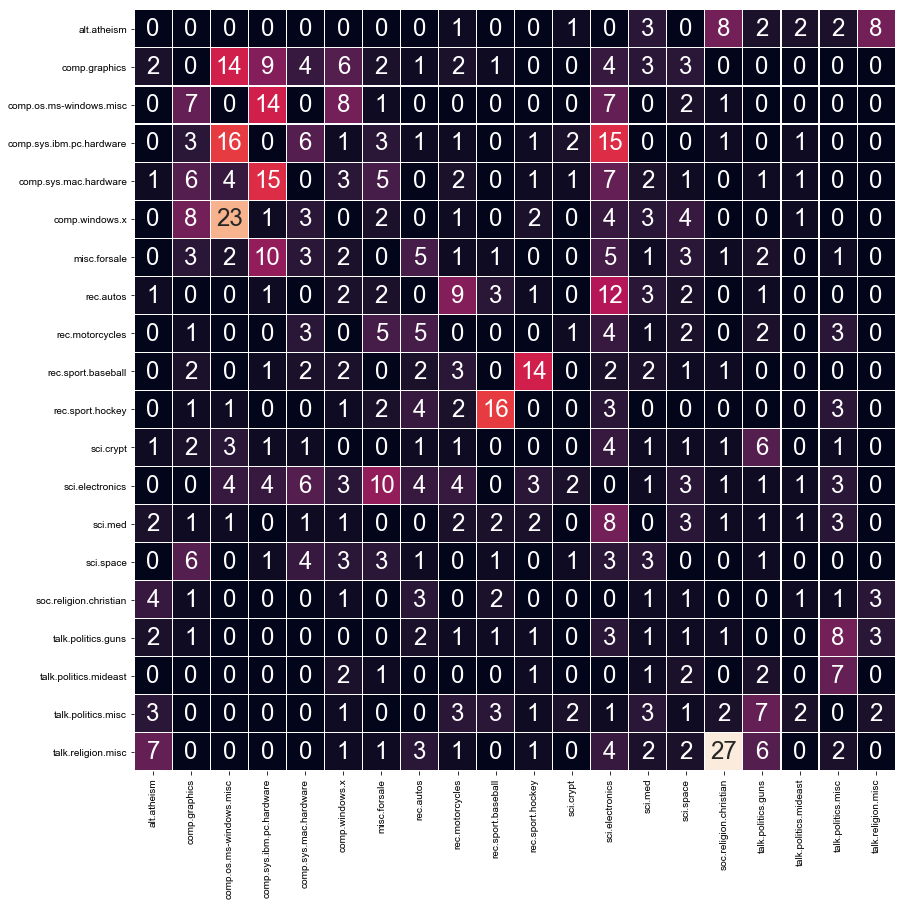

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusion_matrix(y_val, y_pred, labels=newsgroups.target_names)
np.fill_diagonal(cm, 0)

fig, ax = plt.subplots(figsize=(14, 14))
sns.set(font_scale=2)
sns.heatmap(
    cm,
    xticklabels=newsgroups.target_names,
    yticklabels=newsgroups.target_names,
    ax=ax,
    square=True,
    annot=True,
    fmt='d',
    linewidths=0.1,
    cbar=False
);

## Issues with the traditional approach

The  big issue is that we don't capture the semantic meaning of the words. For instance, assuming a corpus of 6 different words, if we one-hot encode "pub", "bar", and "tavern", we would get:

```
pub    = [0, 0, 0, 1, 0, 0]
bar    = [1, 0, 0, 0, 0, 0]
tavern = [0, 0, 0, 0, 0, 1]
```

These vectors are orthogonal, and yet we know they are similar! If we could find a space where these words would these words would have a similar representation, they we would surely make the lives of our machine learning models easier, right?

By the way, [stemming and lematization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) help, but they only consider the lexical form of each word, and so are only cheap tricks.

## Word embeddings

- [John Rupert Firth](https://www.wikiwand.com/en/John_Rupert_Firth): "a word is characterized by the company it keeps"
- Idea: represent a word by a vector of semantic concepts
- For instance:

```
    queen = {
        royalty: 0.98,
        woman: 0.9,
        country: 0.6
    }
    
    cat = {
        woman: 0.7,
        animal: 0.95,
        individual: 0.8
    }
    
    cats = {
        woman: 0.6,
        animal: 0.94,
        plural: 0.75
    }
```
    
- Words embeddings are also called "word vectors" or "word representations"
- There are less semantic concepts than words: lower dimensional space
- Synonyms such as "happy" and "cheerful" will be close in this "concept space"
- A neural network (but not only) can learn to find these concepts

![word2vec](word2vec.png)

## Words embeddings with spacy

[spacy](https://spacy.io/) is a popular NLP toolkit for Python , tt has many features and essentially wraps pre-trained neural networks.

We can download the pre-calculated concept vectors via the following command.

In [106]:
!python -m spacy download en_core_web_md

    100% |████████████████████████████████| 96.4MB 2.3MB/s ta 0:00:0121    33% |██████████▋                     | 32.0MB 16.5MB/s eta 0:00:04    75% |████████████████████████▏       | 72.7MB 2.7MB/s eta 0:00:09
  Running setup.py install for en-core-web-md ... done
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


Let us now load the concept vectors named `en_core_web_md`. In the [documentation](https://spacy.io/models/en#en_core_web_md), the following description is given:

> English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Assigns word vectors, context-specific token vectors, POS tags, dependency parse and named entities.

In [27]:
import spacy

nlp = spacy.load('en_core_web_md')  # Takes some time

In [28]:
type(nlp)

spacy.lang.en.English

In [29]:
?nlp

In [30]:
nlp('Queen').vector

array([ 0.4095   , -0.22693  ,  0.25362  , -0.36055  , -0.37095  ,
       -0.35181  ,  0.50669  , -0.77897  , -0.32571  ,  1.4895   ,
        0.052438 , -0.36751  , -0.074025 ,  0.37078  ,  0.063077 ,
        0.32274  ,  0.346    ,  0.64214  , -0.09583  ,  0.14303  ,
       -0.33826  ,  0.79005  , -0.7136   , -0.050134 , -0.46467  ,
       -0.067917 , -0.32107  ,  0.042919 ,  0.018576 ,  0.59272  ,
       -0.032392 ,  0.72779  ,  0.26002  ,  0.30401  ,  0.43033  ,
        0.25546  , -0.37986  , -0.14398  , -0.54399  , -0.46181  ,
        0.11046  , -0.034391 , -0.10458  , -0.069689 ,  0.091839 ,
       -0.19097  , -0.057108 ,  0.61218  , -0.19544  , -0.31698  ,
       -0.46372  ,  0.088749 , -0.052501 , -0.27969  ,  0.025125 ,
       -0.42097  , -0.069404 , -0.038672 , -0.26489  ,  0.10911  ,
       -0.084848 , -0.23826  ,  0.61538  ,  0.0039223,  0.20285  ,
        0.56085  ,  0.015419 ,  0.30707  ,  0.19435  , -0.20358  ,
       -0.18724  , -0.10311  , -0.46468  , -0.16804  ,  0.2261

In [31]:
import itertools
import scipy


def distance(x, y):
    return 1 - scipy.spatial.distance.cosine(x, y)


words = ['Queen', 'King', 'Woman', 'Man']

for w1, w2 in itertools.combinations(words, 2):
    print(f'Distance between "{w1}" and "{w2}": {distance(nlp(w1).vector, nlp(w2).vector)}')

Distance between "Queen" and "King": 0.7252610325813293
Distance between "Queen" and "Woman": 0.4066064953804016
Distance between "Queen" and "Man": 0.27109137177467346
Distance between "King" and "Woman": 0.2655659019947052
Distance between "King" and "Man": 0.4088461697101593
Distance between "Woman" and "Man": 0.7401744723320007


In [32]:
distance(
    x=nlp('King').vector - nlp('Man').vector + nlp('Woman').vector,
    y=nlp('Queen').vector
)

0.7880843877792358

In [33]:
distance(
    x=nlp('Potato').vector,
    y=nlp('Queen').vector
)

0.2540188431739807

In [34]:
distance(
    x=nlp('Brought').vector - nlp('Bring').vector + nlp('Seek').vector,
    y=nlp('Sought').vector
)

0.8020331263542175

In [35]:
distance(
    x=nlp('Brought').vector - nlp('Bring').vector + nlp('Seek').vector,
    y=nlp('Potato').vector
)

0.08445359766483307

Let's convert the newsgroup corpus to vectors. This takes a bit of time...

In [36]:
vectors = np.array([
    nlp(str(x)).vector
    for x in X
])

In [37]:
vectors.shape

(11314, 300)

In [45]:
model = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')
)
    
cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)

val_scores = []

for i, (fit_idx, val_idx) in enumerate(cv.split(vectors, y)):
    
    X_fit, y_fit = vectors[fit_idx], y[fit_idx]
    X_val, y_val = vectors[val_idx], y[val_idx]

    model = model.fit(X_fit, y_fit)
    y_pred = model.predict(X_val)
    
    score = metrics.accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f'Score for fold {i}: {100 * score:.2f}%')

/home/max/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score for fold 0: 78.29%


/home/max/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score for fold 1: 76.35%
Score for fold 2: 77.96%


/home/max/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


This isn't working as well as TF-IDF, also the logistic regression seems to be having trouble converging. This is probably because the word embeddings are not "good enough" because they are too generalistic. Ideally we should train embeddings for our specific dataset.

## How does it work?

- Words embeddings can be obtained in different ways
- The general idea is to teach a neural network to predict a word based on a context:
    - CBOW: predict a word given a window of past words.
    - Skip-gram: the input is the target word, while the outputs are the words surrounding the target words. 
- Word2Vec stands for the approach of converting a word/sentence to a vector, CBOW and Skip-Gram are methods based on this approach.
- In each case, the words are represented as binary vectors of 0s and 1s
- The embeddings are the weights of the intermediate layer! 

Let's take a closer look at skip-gram model.

![skip-gram](skip-gram.png)

The basic model used to obtain embeddings is thus a simple neural network with one hidden layer. During training, the inputs and outputs are one-hot encoded versions of the word tokens. The hidden layer is thus a linear combination of words. If you think about it this is thus very similar to [Latent Dirichlet Allocation (LDA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) but without the parametric constraints.

Naturally, word embeddings is a very active research field and many variants have been proposed.  

## Training a word embedding model

We'll use scikit-learn to clean the text.

In [46]:
from sklearn import preprocessing

counter = feature_extraction.text.CountVectorizer(min_df=0.01, max_df=0.3, stop_words='english')
analyzer = counter.build_analyzer()
' '.join(analyzer(X[0]))

'lerxst wam umd edu thing subject car nntp posting host rac3 wam umd edu organization university maryland college park lines 15 wondering enlighten car saw day door sports car looked late 60s early 70s called bricklin doors really small addition bumper separate rest body know tellme model engine specs years production car history info funky looking car mail thanks il brought neighborhood lerxst'

Clean all the documents.

In [47]:
docs = [analyzer(x) for x in X]

We'll use [GenSim](https://radimrehurek.com/gensim/models/word2vec.html) to obtain our word embeddings. The documentation for Word2Vec is available [here](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec).

In [52]:
from gensim.models import Word2Vec

w2v = Word2Vec(docs, size=100, window=5, min_count=1, workers=4)

In [54]:
w2v['Queen']

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'Queen' not in vocabulary"

In [83]:
w2v.most_similar('university')

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('college', 0.8586224317550659),
 ('univ', 0.8255643844604492),
 ('dept', 0.8070756793022156),
 ('blacksburg', 0.7937623858451843),
 ('department', 0.7886319756507874),
 ('youngstown', 0.7874414920806885),
 ('bowling', 0.7770978212356567),
 ('disorganized', 0.7719284296035767),
 ('physics', 0.771500825881958),
 ('philosphy', 0.7670626044273376)]

Let's save the word embeddings to the disk and load them spacy. 

In [78]:
w2v.wv.save_word2vec_format('newsgroup_embeddings.txt')

Load the vectors into spacy.

In [86]:
w2v.wv.vectors.shape

(129796, 100)

In [91]:
# Inspired from https://stackoverflow.com/questions/42094180/spacy-how-to-load-google-news-word2vec-vectors

# Init blank english spacy nlp object
nlp = spacy.blank('en')

# Loop through range of all indexes, get words associated with each index
keys = []
for idx in range(w2v.wv.vectors.shape[0]):
    keys.append(w2v.wv.index2word[idx])

# Set the vectors for our nlp object to
nlp.vocab.vectors = spacy.vocab.Vectors(data=w2v.wv.vectors, keys=keys)

In [92]:
nlp.vocab.vectors.shape

(129796, 100)

Let's rerun our pipeline and see if using custom embeddings works better than using generic ones.

In [93]:
vectors = np.array([
    nlp(str(x)).vector
    for x in X
])

model = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')
)
    
cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)

val_scores = []

for i, (fit_idx, val_idx) in enumerate(cv.split(vectors, y)):
    
    X_fit, y_fit = vectors[fit_idx], y[fit_idx]
    X_val, y_val = vectors[val_idx], y[val_idx]

    model = model.fit(X_fit, y_fit)
    y_pred = model.predict(X_val)
    
    score = metrics.accuracy_score(y_val, y_pred)
    val_scores.append(score)
    
    print(f'Score for fold {i}: {100 * score:.2f}%')

/home/max/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score for fold 0: 58.43%


/home/max/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score for fold 1: 57.84%
Score for fold 2: 56.85%


/home/max/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


We can also train word embeddings as part of a classification pipeline. This was in fact how word embeddings were first introduced in [this 2003 paper](http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf).

In [ ]:
from keras import layers
from keras import models

# 
vocab_size = 100
max_length = 32

# Define the model
model = models.Sequential([
    layers.embeddings.Embedding(vocab_size, 8, input_length=max_length),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

## Downsides of word embeddings

- Words with multiple meanings (polysemy) have a single representation, which obviously isn't correct
- No clear to combine words when vectorizing a sentence, by default people use averaging but other methods exist (see [doc2vec](https://medium.com/wisio/a-gentle-introduction-to-doc2vec-db3e8c0cce5e))

## Recurrent neural networks (RNNs)

- Both the traditional approach and word embeddings do not take into account the structure of a sentence.
- Ideally, we would like to take into account the sequential nature of a sentence instead of considering words individually. For instance, we want our model to understand that "I don't like it", even though "like" is part of the sentence.

**Some stuff worth reading when you're bored:**

- [The Unreasonable Effectiveness of Recurrent Neural Networks - Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
- [Understanding LSTM Networks - Christopher Olah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [Recurrent Neural Networks Tutorial - WildML](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/)
- [How to implement a simple RNN - Peter Roelants](https://peterroelants.github.io/posts/rnn-implementation-part01/)

The basic idea of RNNs is to learn from *sequences*. For example: a sequence of timeseries observations, a succession of words, a sequence of [drawing strokes](https://magenta.tensorflow.org/assets/sketch_rnn_demo/index.html)...

![charseq.jpeg](charseq.jpeg)

In a standard neural network, our model is schematically:

```
input -> hidden -> output
```

For instance, we could have the current value of a stock and we would like to predict it's value in ten minutes. The issue is that we have no memory of the past stock prices. Maybe there's a downward trend, maybe that the pattern of past values is meaningful. We need some way to memorize past information because the IID assumption is violated. A traditional way is through auto-regressive models:

```
(input + prev_input) -> hidden -> output
```

This is a well-known approach (for instance the ARMA model for timeseries), but has it's limitations. If we unroll this over 4 iterations, we get:

```
(input + empty_input) -> hidden -> output
(input + prev_input) -> hidden -> output
(input + prev_input) -> hidden -> output
(input + prev_input) -> hidden -> output
```

Let's the color the states to visualize what the model can memorize:

<pre>
<code>
(<font color='blue'>input</font> + empty_input) -> <font color='blue'>hidden</font> -> output
(<font color='red'>input</font> + prev_<font color='blue'>input</font>) -> <font color='red'>hid</font><font color='blue'>den</font> -> output
(<font color='green'>input</font> + prev_<font color='red'>input</font>) -> <font color='green'>hid</font><font color='red'>den</font> -> output
(<font color='orange'>input</font> + prev_<font color='green'>input</font>) -> <font color='orange'>hid</font><font color='green'>den</font> -> output
</code>
</pre>

In an RNN, instead of using the previous input layer, we use the previous hidden state. Schematically this is:

```
(input + prev_hidden) -> hidden -> output
```

If we unroll this for 4 iterations and color it as we did before, we obtain:

<pre>
<code>
(<font color='blue'>input</font> + empty_input) -> <font color='blue'>hidden</font> -> output
(<font color='red'>input</font> + prev_<font color='blue'>hidden</font>) -> <font color='red'>hid</font><font color='blue'>den</font> -> output
(<font color='green'>input</font> + prev_<font color='red'>hid</font><font color='blue'>den</font>) -> <font color='green'>hi</font><font color='red'>dd</font><font color='blue'>en</font> -> output
(<font color='orange'>input</font> + prev_<font color='green'>hi</font><font color='red'>dd</font><font color='blue'>en</font>) -> <font color='orange'>hi</font><font color='green'>d</font><font color='red'>d</font><font color='blue'>en</font> -> output
</code>
</pre>

This kind of recursion is smart because it implicitely has access to all the previous inputs. It's the key insight of RNNs. The rest of RNN theory and methodology is about learning to remember/forget. By the way, the following visualization is taken from [here](https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm).

Now let's see if we can use an RNN to improve the score on our newsgroup classification task.

In [98]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 244134 unique tokens.


In [99]:
word_index

{'the': 1,
 '\n': 2,
 'to': 3,
 'of': 4,
 "'ax": 5,
 'a': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'i': 10,
 'that': 11,
 'it': 12,
 'for': 13,
 'you': 14,
 'from': 15,
 '\n\n': 16,
 'on': 17,
 'be': 18,
 'this': 19,
 'not': 20,
 'are': 21,
 'have': 22,
 'edu': 23,
 'with': 24,
 'as': 25,
 'or': 26,
 '1': 27,
 'was': 28,
 'but': 29,
 'if': 30,
 'they': 31,
 '\nsubject': 32,
 'at': 33,
 'by': 34,
 'com': 35,
 'an': 36,
 'can': 37,
 'my': 38,
 '2': 39,
 'will': 40,
 'all': 41,
 're': 42,
 'what': 43,
 '3': 44,
 'do': 45,
 'would': 46,
 'one': 47,
 '0': 48,
 'there': 49,
 'writes': 50,
 'about': 51,
 'we': 52,
 'he': 53,
 'has': 54,
 'so': 55,
 'your': 56,
 'no': 57,
 'article': 58,
 'me': 59,
 'any': 60,
 'some': 61,
 'who': 62,
 'out': 63,
 'posting': 64,
 'like': 65,
 'which': 66,
 'people': 67,
 'more': 68,
 "don't": 69,
 'r': 70,
 'q': 71,
 'w': 72,
 'when': 73,
 '4': 74,
 'host': 75,
 'up': 76,
 'just': 77,
 'were': 78,
 'p': 79,
 '5': 80,
 'know': 81,
 's': 82,
 'their': 83,
 'how': 84,


In [101]:
from keras.preprocessing.sequence import pad_sequences

tokens = tokenizer.texts_to_sequences(X)
tokens = pad_sequences(tokens, maxlen=250)
tokens.shape

(11314, 250)

In [109]:
y

array(['rec.autos', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', ...,
       'comp.sys.ibm.pc.hardware', 'comp.graphics', 'rec.motorcycles'],
      dtype='<U24')

In [108]:
from keras import layers
from keras import models


epochs = 5
batch_size = 64

for i, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    
    X_fit, y_fit = X[fit_idx], y[fit_idx]
    X_val, y_val = X[val_idx], y[val_idx]
    
    model = models.Sequential([
        layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
        layers.SpatialDropout1D(0.2),
        layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
        layers.Dense(20, activation='softmax')    
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(
        X_fit,
        y_fit,
        epochs=5,
        batch_size=16,
        validation_split=0.1
    )

ValueError: Error when checking target: expected dense_3 to have shape (20,) but got array with shape (1,)

## BERT

https://yashuseth.blog/2019/06/12/bert-explained-faqs-understand-bert-working/

## Case-study: Kaggle Toxic Comment Classification Challenge

- [1st place solution](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/52557#latest-658995)

## Case-study: Quora Question Pairs

To do: describe it

- [24th place solution](https://github.com/aerdem4/kaggle-quora-dup)

## Problem set

1. Implement [GloVe](https://nlp.stanford.edu/projects/glove/). Bonus points if you can plug in any stochastic optimizer.
2. Implement the FTRL optimizer from [this](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/41159.pdf) paper. Train a linear (or logistic, your choice) regression with it.
3. Do a review on dropout, you can start from the initial [paper](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf).
4. Implement [focal loss](https://arxiv.org/abs/1708.02002) in a logistic regression, try it out on the [credit card fraud dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud).
5. Do a review on the differences between Word2Vec, Sentence2Vec, and Doc2Vec.
6. Implement an autoencoder. Train it on the MNIST training set and use it to find outliers in the MNIST test set. You can start from [this](https://blog.keras.io/building-autoencoders-in-keras.html) tutorial.
7. Implement [NBSVM](https://nlp.stanford.edu/pubs/sidaw12_simple_sentiment.pdf) and compare it to SVM and Naive Bayes on a text dataset of your choice.
8. Use [Bayesian optimization](http://krasserm.github.io/2018/03/21/bayesian-optimization/) (you can find opensource implementations online) to find the optimal number of layers and neurons for an [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Use a dataset of your choice.
9. [Throw the kitchen sink](https://www.urbandictionary.com/define.php?term=Throw%20the%20Kitchen%20Sink) at a text classification dataset of your choice. Ideally you should produce a table or a timeline that shows the progress of the accuracy everytime you add something to your model.
10. Build an RNN to generate text. You can use whatever dataset you like.
11. Do a review on stochastic gradient descent and the different choices a practionner has to make.
12. Implement backpropagation and use finite differences to test your implementation.